**ЭТАПЫ Data Science проекта:**
1. Определить бизнес проблему
2. Убедить бизнес, что ее можно и нужно решать с помощью ML
3. Перевести бизнес проблему в ML-задачу
4. Выбрать подходящие ML и бизнес метрики
---------------------------------------------------------------------------
5. Загрузка и предобаботка данных
6. **_EDA: визуализация данных_**
7. **_Очистка данных и feature engineering_**
8. Разбиение данных на train и test
9. Построение ML моделей
10. Оценка качества ML моделей и выбор наилучшей

---------------------------------------------------------------------------
11. Доказать бизнес-заказчику, что модель хорошо работает
12. Внедрение модели в production
13. Тестирование модели
14. Улучшение модели и поддержка и мониторинг

**EDA** - Exploratory Data Analysis<a class='anchor' id='eda'>


**Зачем это?**
- Понимание, как устроены данные
- Проверка фичей на адекватность
- _Генерация новых фич_ - наибольший вклад в качество прогноза


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import numpy as np

Mounted at /content/drive/


**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

## Работа с pandas

### Типы данных в pandas

Основной объект - DataFrame

Каждый столбец Pandas DataFrame — это экземпляр класса Pandas.Series — структуры, которая содержит одномерные данные и их метки

Series может хранить различные типы данных, включая числа, строки и произвольные объекты Python.

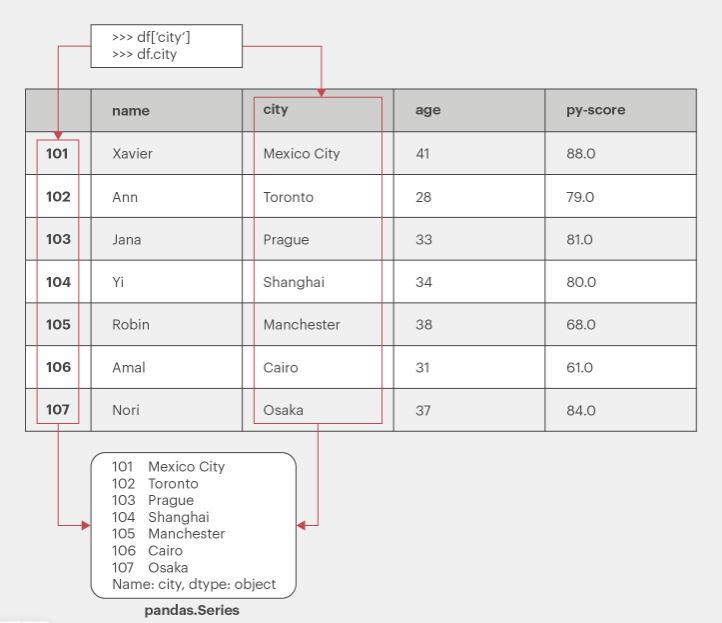

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shift_2024/california_housing/housing.csv', index_col=0)

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity     id  
0            NEAR BAY      0  
1            NEAR BAY      1  
2            NEAR BAY      2  
3            NEAR BAY      3  
4            NEAR BAY      4  
...               ...    ...  
20635          INLAND  20635  
20636          INLAND  20636  
20637          INLAND  20637  
20638          INLAND  20638  
20639          INLAND  20639  

[20640 rows x 11 columns]

In [ ]:
df.shape

(20640, 11)

In [ ]:
df['longitude']

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(type(df['longitude']))

<class 'pandas.core.series.Series'>


In [ ]:
df['longitude'].dtype

dtype('float64')

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [ ]:
df['total_rooms'].values

array([ 880., 7099., 1467., ..., 2254., 1860., 2785.])

In [ ]:
print(type(df['total_rooms'].values))

<class 'numpy.ndarray'>


In [ ]:
df['total_rooms'].astype(str)

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: object

In [ ]:
df.select_dtypes(include=['float64']).head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0

In [ ]:
df.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   

   id  
0   0  
1   1  
2   2

In [ ]:
df.tail(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity     id  
20637          INLAND  20637  
20638          INLAND  20638  
20639          INLAND  20639

In [ ]:
df.sample(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3169     -118.91     35.24                29.0       2888.0           753.0   
13016    -121.18     38.69                 7.0       7104.0           970.0   
18627    -121.96     37.10                20.0        922.0           155.0   

       population  households  median_income  median_house_value  \
3169       2949.0       699.0         1.7716             45500.0   
13016      2772.0       920.0         6.3528            274500.0   
18627       361.0       135.0         6.3617            331500.0   

      ocean_proximity     id  
3169           INLAND   3169  
13016          INLAND  13016  
18627       <1H OCEAN  18627

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

### Фильтрация в pandas

In [ ]:
df['housing_median_age']

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

In [ ]:
df.housing_median_age

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

In [ ]:
df[['total_rooms', 'total_bedrooms']]

total_rooms  total_bedrooms
0            880.0           129.0
1           7099.0          1106.0
2           1467.0           190.0
3           1274.0           235.0
4           1627.0           280.0
...            ...             ...
20635       1665.0           374.0
20636        697.0           150.0
20637       2254.0           485.0
20638       1860.0           409.0
20639       2785.0           616.0

[20640 rows x 2 columns]

In [ ]:
df['housing_median_age'] > 30

0         True
1        False
2         True
3         True
4         True
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: housing_median_age, Length: 20640, dtype: bool

In [ ]:
df[df['housing_median_age'] > 30]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
20620    -121.48     39.05                40.0        198.0            41.0   
20621    -121.47     39.01                37.0       1244.0           247.0   
20623    -121.37     39.03                32.0       1158.0           244.0   
20625    -121.52     39.12                37.0        102.0            17.0   
20626    -121.43     39.18                36.0       1124.0           184.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
...           ...         ...            ...                 ...   
20620       151.0        48.0         4.5625            100000.0   
20621       484.0       157.0         2.3661             77500.0   
20623       598.0       227.0         2.8235             65500.0   
20625        29.0        14.0         4.1250             72000.0   
20626       504.0       171.0         2.1667             93800.0   

      ocean_proximity     id  
0            NEAR BAY      0  
2            NEAR BAY      2  
3            NEAR BAY      3  
4            NEAR BAY      4  
5            NEAR BAY      5  
...               ...    ...  
20620          INLAND  20620  
20621          INLAND  20621  
20623          INLAND  20623  
20625          INLAND  20625  
20626          INLAND  20626  

[9495 rows x 11 columns]

In [ ]:
df[(df['housing_median_age'] > 30) & (df['total_rooms'] > 2000)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
...          ...       ...                 ...          ...             ...   
20560    -121.78     38.67                38.0       2948.0           478.0   
20561    -121.77     38.67                42.0       2670.0           518.0   
20562    -121.77     38.67                45.0       2438.0           462.0   
20596    -121.57     39.16                33.0       2033.0           375.0   
20599    -121.56     39.16                35.0       2157.0           441.0   

       population  households  median_income  median_house_value  \
6          1094.0       514.0         3.6591            299200.0   
7          1157.0       647.0         3.1200            241400.0   
8          1206.0       595.0         2.0804            226700.0   
9          1551.0       714.0         3.6912            261100.0   
10          910.0       402.0         3.2031            281500.0   
...           ...         ...            ...                 ...   
20560      1123.0       460.0         4.0556            146900.0   
20561      1548.0       534.0         2.2794            108900.0   
20562      1415.0       510.0         2.8351            107200.0   
20596       914.0       330.0         2.6964             68500.0   
20599      1009.0       409.0         1.5827             63000.0   

      ocean_proximity     id  
6            NEAR BAY      6  
7            NEAR BAY      7  
8            NEAR BAY      8  
9            NEAR BAY      9  
10           NEAR BAY     10  
...               ...    ...  
20560          INLAND  20560  
20561          INLAND  20561  
20562          INLAND  20562  
20596          INLAND  20596  
20599          INLAND  20599  

[3819 rows x 11 columns]

In [ ]:
df[(df['housing_median_age'] > 30) | (df['total_rooms'] > 2000)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20632    -121.45     39.26                15.0       2319.0           416.0   
20633    -121.53     39.19                27.0       2080.0           412.0   
20634    -121.56     39.27                28.0       2332.0           395.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20632      1047.0       385.0         3.1250            115600.0   
20633      1082.0       382.0         2.5495             98300.0   
20634      1041.0       344.0         3.7125            116800.0   
20637      1007.0       433.0         1.7000             92300.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity     id  
0            NEAR BAY      0  
1            NEAR BAY      1  
2            NEAR BAY      2  
3            NEAR BAY      3  
4            NEAR BAY      4  
...               ...    ...  
20632          INLAND  20632  
20633          INLAND  20633  
20634          INLAND  20634  
20637          INLAND  20637  
20639          INLAND  20639  

[16895 rows x 11 columns]

In [ ]:
~(df['housing_median_age'] > 30)

0        False
1         True
2        False
3        False
4        False
         ...  
20635     True
20636     True
20637     True
20638     True
20639     True
Name: housing_median_age, Length: 20640, dtype: bool

In [ ]:
df[~(df['housing_median_age'] > 30)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                21.0       7099.0          1106.0   
50       -122.27     37.82                21.0        896.0           453.0   
59       -122.29     37.82                 2.0        158.0            43.0   
70       -122.29     37.81                26.0        768.0           152.0   
74       -122.29     37.81                20.0        835.0           161.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
1          2401.0      1138.0         8.3014            358500.0   
50          735.0       438.0         0.9218            171900.0   
59           94.0        57.0         2.5625             60000.0   
70          392.0       127.0         1.7719             82500.0   
74          290.0       133.0         2.4830            137500.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity     id  
1            NEAR BAY      1  
50           NEAR BAY     50  
59           NEAR BAY     59  
70           NEAR BAY     70  
74           NEAR BAY     74  
...               ...    ...  
20635          INLAND  20635  
20636          INLAND  20636  
20637          INLAND  20637  
20638          INLAND  20638  
20639          INLAND  20639  

[11145 rows x 11 columns]

In [ ]:
df[df['ocean_proximity'].isin(['NEAR BAY', 'NEAR OCEAN'])]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20380    -118.83     34.14                16.0       1316.0           194.0   
20381    -118.83     34.14                16.0       1956.0           312.0   
20423    -119.00     34.08                17.0       1822.0           438.0   
20424    -118.75     34.18                 4.0      16704.0          2704.0   
20425    -118.75     34.17                18.0       6217.0           858.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20380       450.0       173.0        10.1597            500001.0   
20381       671.0       319.0         6.4001            321800.0   
20423       578.0       291.0         5.4346            428600.0   
20424      6187.0      2207.0         6.6122            357600.0   
20425      2703.0       834.0         6.8075            325900.0   

      ocean_proximity     id  
0            NEAR BAY      0  
1            NEAR BAY      1  
2            NEAR BAY      2  
3            NEAR BAY      3  
4            NEAR BAY      4  
...               ...    ...  
20380      NEAR OCEAN  20380  
20381      NEAR OCEAN  20381  
20423      NEAR OCEAN  20423  
20424      NEAR OCEAN  20424  
20425      NEAR OCEAN  20425  

[4948 rows x 11 columns]

In [ ]:
df[df['total_bedrooms'].isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity     id  
290          NEAR BAY    290  
341          NEAR BAY    341  
538          NEAR BAY    538  
563          NEAR BAY    563  
696          NEAR BAY    696  
...               ...    ...  
20267      NEAR OCEAN  20267  
20268      NEAR OCEAN  20268  
20372       <1H OCEAN  20372  
20460       <1H OCEAN  20460  
20484       <1H OCEAN  20484  

[207 rows x 11 columns]

### индексация

In [ ]:
tmp = df[~(df['housing_median_age'] > 30)]
tmp

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                21.0       7099.0          1106.0   
50       -122.27     37.82                21.0        896.0           453.0   
59       -122.29     37.82                 2.0        158.0            43.0   
70       -122.29     37.81                26.0        768.0           152.0   
74       -122.29     37.81                20.0        835.0           161.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
1          2401.0      1138.0         8.3014            358500.0   
50          735.0       438.0         0.9218            171900.0   
59           94.0        57.0         2.5625             60000.0   
70          392.0       127.0         1.7719             82500.0   
74          290.0       133.0         2.4830            137500.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity     id  
1            NEAR BAY      1  
50           NEAR BAY     50  
59           NEAR BAY     59  
70           NEAR BAY     70  
74           NEAR BAY     74  
...               ...    ...  
20635          INLAND  20635  
20636          INLAND  20636  
20637          INLAND  20637  
20638          INLAND  20638  
20639          INLAND  20639  

[11145 rows x 11 columns]

In [ ]:
tmp.loc[50]

longitude              -122.27
latitude                 37.82
housing_median_age        21.0
total_rooms              896.0
total_bedrooms           453.0
population               735.0
households               438.0
median_income           0.9218
median_house_value    171900.0
ocean_proximity       NEAR BAY
id                          50
Name: 50, dtype: object

In [ ]:
tmp.iloc[1]

longitude              -122.27
latitude                 37.82
housing_median_age        21.0
total_rooms              896.0
total_bedrooms           453.0
population               735.0
households               438.0
median_income           0.9218
median_house_value    171900.0
ocean_proximity       NEAR BAY
id                          50
Name: 50, dtype: object

In [ ]:
tmp.loc[:60]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1     -122.22     37.86                21.0       7099.0          1106.0   
50    -122.27     37.82                21.0        896.0           453.0   
59    -122.29     37.82                 2.0        158.0            43.0   

    population  households  median_income  median_house_value ocean_proximity  \
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY   
50       735.0       438.0         0.9218            171900.0        NEAR BAY   
59        94.0        57.0         2.5625             60000.0        NEAR BAY   

    id  
1    1  
50  50  
59  59

In [ ]:
tmp.iloc[-6:-1]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20634    -121.56     39.27                28.0       2332.0           395.0   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   

       population  households  median_income  median_house_value  \
20634      1041.0       344.0         3.7125            116800.0   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   

      ocean_proximity     id  
20634          INLAND  20634  
20635          INLAND  20635  
20636          INLAND  20636  
20637          INLAND  20637  
20638          INLAND  20638

In [ ]:
tmp = tmp.reset_index()
tmp

index  longitude  latitude  housing_median_age  total_rooms  \
0          1    -122.22     37.86                21.0       7099.0   
1         50    -122.27     37.82                21.0        896.0   
2         59    -122.29     37.82                 2.0        158.0   
3         70    -122.29     37.81                26.0        768.0   
4         74    -122.29     37.81                20.0        835.0   
...      ...        ...       ...                 ...          ...   
11140  20635    -121.09     39.48                25.0       1665.0   
11141  20636    -121.21     39.49                18.0        697.0   
11142  20637    -121.22     39.43                17.0       2254.0   
11143  20638    -121.32     39.43                18.0       1860.0   
11144  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0              1106.0      2401.0      1138.0         8.3014   
1               453.0       735.0       438.0         0.9218   
2                43.0        94.0        57.0         2.5625   
3               152.0       392.0       127.0         1.7719   
4               161.0       290.0       133.0         2.4830   
...               ...         ...         ...            ...   
11140           374.0       845.0       330.0         1.5603   
11141           150.0       356.0       114.0         2.5568   
11142           485.0      1007.0       433.0         1.7000   
11143           409.0       741.0       349.0         1.8672   
11144           616.0      1387.0       530.0         2.3886   

       median_house_value ocean_proximity     id  
0                358500.0        NEAR BAY      1  
1                171900.0        NEAR BAY     50  
2                 60000.0        NEAR BAY     59  
3                 82500.0        NEAR BAY     70  
4                137500.0        NEAR BAY     74  
...                   ...             ...    ...  
11140             78100.0          INLAND  20635  
11141             77100.0          INLAND  20636  
11142             92300.0          INLAND  20637  
11143             84700.0          INLAND  20638  
11144             89400.0          INLAND  20639  

[11145 rows x 12 columns]

In [ ]:
tmp = tmp.set_index('index')
tmp

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
index                                                                         
1        -122.22     37.86                21.0       7099.0          1106.0   
50       -122.27     37.82                21.0        896.0           453.0   
59       -122.29     37.82                 2.0        158.0            43.0   
70       -122.29     37.81                26.0        768.0           152.0   
74       -122.29     37.81                20.0        835.0           161.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
index                                                              
1          2401.0      1138.0         8.3014            358500.0   
50          735.0       438.0         0.9218            171900.0   
59           94.0        57.0         2.5625             60000.0   
70          392.0       127.0         1.7719             82500.0   
74          290.0       133.0         2.4830            137500.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity     id  
index                         
1            NEAR BAY      1  
50           NEAR BAY     50  
59           NEAR BAY     59  
70           NEAR BAY     70  
74           NEAR BAY     74  
...               ...    ...  
20635          INLAND  20635  
20636          INLAND  20636  
20637          INLAND  20637  
20638          INLAND  20638  
20639          INLAND  20639  

[11145 rows x 11 columns]

In [ ]:
pd.concat([tmp.longitude, tmp.longitude.reset_index()], axis=1)

longitude    index  longitude
1        -122.22     50.0    -122.27
50       -122.27    508.0    -122.30
59       -122.29    570.0    -122.24
70       -122.29    593.0    -122.09
74       -122.29    610.0    -122.09
...          ...      ...        ...
11134        NaN  20629.0    -121.39
11137        NaN  20632.0    -121.45
11139        NaN  20634.0    -121.56
11140        NaN  20635.0    -121.09
11142        NaN  20637.0    -121.22

[17277 rows x 3 columns]

In [ ]:
pd.concat([tmp.longitude, tmp.longitude], axis=1)

longitude  longitude
index                      
1        -122.22    -122.22
50       -122.27    -122.27
59       -122.29    -122.29
70       -122.29    -122.29
74       -122.29    -122.29
...          ...        ...
20635    -121.09    -121.09
20636    -121.21    -121.21
20637    -121.22    -121.22
20638    -121.32    -121.32
20639    -121.24    -121.24

[11145 rows x 2 columns]

### Статистика

#### Количественные переменные

*Количественные (непрерывные) переменные*  - это переменные, которые могут принимать любые числовые значения в некотором диапазоне.

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  id  
0       322.0       126.0         8.3252            452600.0   0  
1      2401.0      1138.0         8.3014            358500.0   1  
2       496.0       177.0         7.2574            352100.0   2  
3       558.0       219.0         5.6431            341300.0   3  
4       565.0       259.0         3.8462            342200.0   4

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.715053     35.631861           28.639486   2635.763081   
std        6.898233      2.135952           12.585558   2181.615252   
min     -422.170000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.500000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value            id  
count        20640.000000  20640.000000  
mean        206855.816909  10319.500000  
std         115395.615874   5958.399114  
min          14999.000000      0.000000  
25%         119600.000000   5159.750000  
50%         179700.000000  10319.500000  
75%         264725.000000  15479.250000  
max         500001.000000  20639.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
df['housing_median_age'].mean()

28.639486434108527

In [ ]:
df['housing_median_age'].sum() / df['housing_median_age'].count()

28.639486434108527

**Дисперсия и стандартное отклонение**

*Дисперсия* - это показатель вариации, который представляет собой средний квадрат отклонений от математического ожидания (среднее арифметическое). Она выражает разброс чисел относительно среднего значения.

*Стандартное отклонение* (среднеквадратичное отклонение) - это величина, характеризующая разброс данных относительно среднего значения.

In [ ]:
np.mean((df['housing_median_age'] - df['housing_median_age'].mean()) ** 2)

158.38858617035862

In [ ]:
df['housing_median_age'].var()

158.39626040778148

In [ ]:
np.sqrt(df['housing_median_age'].var())

12.58555761211165

In [ ]:
df['housing_median_age'].std()

12.58555761211165

**Медиана**

*Медиана* - значение, которая делит его на две равные части или же проще говоря, это середина отсортированной выборки.

**Квантили**
Могут иметь различные названия, но по сути означают похожие вещи

* Процентили: Диапазон от 0 до 100.
* Квартили: Диапазон от 0 до 4.
* Квантиль: диапазон от любого значения до любого другого значения.

Например Квартили - это значения, которые делят выборку на 4 равные (по количеству объектов) части.
Откуда следует, что вторая квартиль - это медиана.

In [ ]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [ ]:
df['housing_median_age'].quantile(0.25)

18.0

In [ ]:
df['housing_median_age'].quantile(0.75)

37.0

In [ ]:
df['housing_median_age'].quantile(0.5)

29.0

In [ ]:
df['housing_median_age'].median()

29.0

#### Категориальные переменные
    
*Категориальные (Номинативная) переменная* - тип дискретной переменной, качественная (неколичественная) переменная величина

In [ ]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'].nunique()

5

In [ ]:
pd.pivot_table(
    data=df,
    values='median_house_value',
    index='ocean_proximity',
    columns='housing_median_age',
    aggfunc='median',
)

housing_median_age      1.0       2.0       3.0       4.0       5.0   \
ocean_proximity                                                        
<1H OCEAN                NaN  298500.0  278200.0  245400.0  243900.0   
INLAND              165450.0  164400.0  161700.0  150900.0  141450.0   
ISLAND                   NaN       NaN       NaN       NaN       NaN   
NEAR BAY                 NaN  256250.0  274250.0  186800.0  272900.0   
NEAR OCEAN               NaN  186500.0  404450.0  244350.0  178000.0   

housing_median_age      6.0       7.0       8.0       9.0       10.0  ...  \
ocean_proximity                                                       ...   
<1H OCEAN           238750.0  209700.0  253900.0  221750.0  221800.0  ...   
INLAND              135950.0  139650.0  128700.0  132550.0  118800.0  ...   
ISLAND                   NaN       NaN       NaN       NaN       NaN  ...   
NEAR BAY            204200.0  200150.0  246300.0  228900.0  191700.0  ...   
NEAR OCEAN          259800.0  280300.0  164450.0  204200.0  211700.0  ...   

housing_median_age      43.0      44.0      45.0      46.0      47.0  \
ocean_proximity                                                        
<1H OCEAN           175000.0  193200.0  205900.0  189050.0  166300.0   
INLAND               85200.0   92400.0  102900.0   94350.0   87200.0   
ISLAND                   NaN       NaN       NaN       NaN       NaN   
NEAR BAY            150900.0  155200.0  176000.0  203300.0  198100.0   
NEAR OCEAN          241750.0  263800.0  260300.0  221900.0  235100.0   

housing_median_age      48.0      49.0      50.0      51.0      52.0  
ocean_proximity                                                       
<1H OCEAN           214800.0  227600.0  194300.0  278800.0  259400.0  
INLAND               85600.0   93800.0   71500.0   95800.0  109950.0  
ISLAND                   NaN       NaN       NaN       NaN  414700.0  
NEAR BAY            268500.0  170450.0  179100.0  225000.0  292250.0  
NEAR OCEAN          221500.0  259900.0  206300.0  258300.0  254500.0  

[5 rows x 52 columns]

## Обработка пропусков

Основные варианты:
1. Выкинуть эти данные (удалить строки, удалить признак целиком)
2. Заменять пропуски разными методами (медиана, средняя, мода, константа и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать
5. Заполнять эвристикой
6. Заполнять на основе скоррелированных признаков
7. Обучить модель на заполнение пропусков*



In [ ]:
df.isna()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  households  median_income  median_house_value  \
0           False       False          False               False   
1           False       False          False               False   
2           False       False          False               False   
3           False       False          False               False   
4           False       False          False               False   
...           ...         ...            ...                 ...   
20635       False       False          False               False   
20636       False       False          False               False   
20637       False       False          False               False   
20638       False       False          False               False   
20639       False       False          False               False   

       ocean_proximity     id  
0                False  False  
1                False  False  
2                False  False  
3                False  False  
4                False  False  
...                ...    ...  
20635            False  False  
20636            False  False  
20637            False  False  
20638            False  False  
20639            False  False  

[20640 rows x 11 columns]

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

In [ ]:
df.shape

(20640, 11)

In [ ]:
df.dropna()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity     id  
0            NEAR BAY      0  
1            NEAR BAY      1  
2            NEAR BAY      2  
3            NEAR BAY      3  
4            NEAR BAY      4  
...               ...    ...  
20635          INLAND  20635  
20636          INLAND  20636  
20637          INLAND  20637  
20638          INLAND  20638  
20639          INLAND  20639  

[20433 rows x 11 columns]

In [ ]:
df['total_bedrooms_nan'] = 0
df.loc[df['total_bedrooms'].isna(), 'total_bedrooms_nan'] = 1

In [ ]:
df[df['total_bedrooms_nan'] == 1][['total_bedrooms', 'total_bedrooms_nan']]

total_bedrooms  total_bedrooms_nan
290               NaN                   1
341               NaN                   1
538               NaN                   1
563               NaN                   1
696               NaN                   1
...               ...                 ...
20267             NaN                   1
20268             NaN                   1
20372             NaN                   1
20460             NaN                   1
20484             NaN                   1

[207 rows x 2 columns]

In [ ]:
df['total_bedrooms_nan'].value_counts()

total_bedrooms_nan
0    20433
1      207
Name: count, dtype: int64

Простые варианты заполнения пропусков:

**для числовых признаков**
* среднее (плохо работает с выбросами)
* медиана (более утойчива к выбросам)
* заполнить нулями (может поехать признак)
* заполнить исходя из значений скоррелированных признаков

**для категориальных признаков**
* мода
* новая категория

In [ ]:
median = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median)

In [ ]:
df[df['total_bedrooms_nan'] == 1][['total_bedrooms', 'total_bedrooms_nan']]

total_bedrooms  total_bedrooms_nan
290             435.0                   1
341             435.0                   1
538             435.0                   1
563             435.0                   1
696             435.0                   1
...               ...                 ...
20267           435.0                   1
20268           435.0                   1
20372           435.0                   1
20460           435.0                   1
20484           435.0                   1

[207 rows x 2 columns]

## Обработка выбросов

**Выбросы** - это объекты в данных, которые не принадлежат определенной зависимости. Это ненормальное наблюдение, которое находятся далеко от других наблюдений.

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.715053     35.631861           28.639486   2635.763081   
std        6.898233      2.135952           12.585558   2181.615252   
min     -422.170000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.500000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value            id  total_bedrooms_nan  
count        20640.000000  20640.000000        20640.000000  
mean        206855.816909  10319.500000            0.010029  
std         115395.615874   5958.399114            0.099644  
min          14999.000000      0.000000            0.000000  
25%         119600.000000   5159.750000            0.000000  
50%         179700.000000  10319.500000            0.000000  
75%         264725.000000  15479.250000            0.000000  
max         500001.000000  20639.000000            1.000000

Широта принимает значения от −90° до 90°. 0° – широта экватора; −90° – широта Южного полюса; 90° – широта Северного полюса. Положительные значения соответствуют северной широте; отрицательные – южной широте.  
Долгота отсчитывается от нулевого меридиана (IERS Reference Meridian в системе WGS 84) и принимает значения от −180° до 180°. Положительные значения соответствуют восточной долготе; отрицательные – западной долготе

In [ ]:
df[df['longitude'] < -180]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
379      -422.17     37.75                37.0       1379.0           287.0   
8317     -418.32     33.34                52.0        996.0           264.0   
8906     -418.48     34.03                39.0       1530.0           401.0   
10454    -417.66     33.48                22.0        809.0           180.0   
11912    -417.44     33.96                29.0        124.0            22.0   
13960    -416.90     34.25                16.0       3018.0           523.0   
17602    -421.88     37.30                42.0       1867.0           398.0   
18372    -421.90     37.24                24.0       7521.0          1364.0   
20490    -418.68     34.27                26.0       1561.0           212.0   
20557    -421.78     38.68                43.0       3766.0           847.0   

       population  households  median_income  median_house_value  \
379         835.0       259.0         2.4962             91800.0   
8317        341.0       160.0         2.7361            450000.0   
8906       1074.0       375.0         3.5076            381800.0   
10454       334.0       157.0         2.3846            500001.0   
11912        50.0        18.0        12.5381            112500.0   
13960       556.0       244.0         3.5288            189700.0   
17602       927.0       389.0         4.3250            247000.0   
18372      3970.0      1318.0         4.4004            255800.0   
20490       817.0       242.0         5.4770            209100.0   
20557      1855.0       817.0         2.3468            119400.0   

      ocean_proximity     id  total_bedrooms_nan  
379          NEAR BAY    379                   0  
8317           ISLAND   8317                   0  
8906        <1H OCEAN   8906                   0  
10454       <1H OCEAN  10454                   0  
11912          INLAND  11912                   0  
13960          INLAND  13960                   0  
17602       <1H OCEAN  17602                   0  
18372       <1H OCEAN  18372                   0  
20490       <1H OCEAN  20490                   0  
20557          INLAND  20557                   0

In [ ]:
df['longitude_outlier'] = 0
df.loc[df['longitude'] < -180, 'longitude_outlier'] = 1

In [ ]:
df.loc[df['longitude'] < -180, 'longitude'] = df['longitude'].median()

In [ ]:
df[df['longitude_outlier'] == 1]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
379       -118.5     37.75                37.0       1379.0           287.0   
8317      -118.5     33.34                52.0        996.0           264.0   
8906      -118.5     34.03                39.0       1530.0           401.0   
10454     -118.5     33.48                22.0        809.0           180.0   
11912     -118.5     33.96                29.0        124.0            22.0   
13960     -118.5     34.25                16.0       3018.0           523.0   
17602     -118.5     37.30                42.0       1867.0           398.0   
18372     -118.5     37.24                24.0       7521.0          1364.0   
20490     -118.5     34.27                26.0       1561.0           212.0   
20557     -118.5     38.68                43.0       3766.0           847.0   

       population  households  median_income  median_house_value  \
379         835.0       259.0         2.4962             91800.0   
8317        341.0       160.0         2.7361            450000.0   
8906       1074.0       375.0         3.5076            381800.0   
10454       334.0       157.0         2.3846            500001.0   
11912        50.0        18.0        12.5381            112500.0   
13960       556.0       244.0         3.5288            189700.0   
17602       927.0       389.0         4.3250            247000.0   
18372      3970.0      1318.0         4.4004            255800.0   
20490       817.0       242.0         5.4770            209100.0   
20557      1855.0       817.0         2.3468            119400.0   

      ocean_proximity     id  total_bedrooms_nan  longitude_outlier  
379          NEAR BAY    379                   0                  1  
8317           ISLAND   8317                   0                  1  
8906        <1H OCEAN   8906                   0                  1  
10454       <1H OCEAN  10454                   0                  1  
11912          INLAND  11912                   0                  1  
13960          INLAND  13960                   0                  1  
17602       <1H OCEAN  17602                   0                  1  
18372       <1H OCEAN  18372                   0                  1  
20490       <1H OCEAN  20490                   0                  1  
20557          INLAND  20557                   0                  1

**population**

Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.

In [ ]:
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [ ]:
total_rooms_max_value = np.quantile(df['population'], q=0.975)
total_rooms_max_value

4197.024999999998

In [ ]:
total_rooms_min_value = np.quantile(df['population'], q=0.025)
total_rooms_min_value

212.0

In [ ]:
condition = (df['population'] > total_rooms_max_value) | (df['population'] < total_rooms_min_value)
df[condition]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
59       -122.29     37.82                 2.0        158.0            43.0   
61       -122.29     37.82                49.0        135.0            29.0   
73       -122.29     37.81                46.0         12.0             4.0   
81       -122.27     37.81                52.0        210.0            56.0   
82       -122.28     37.81                52.0        340.0            97.0   
...          ...       ...                 ...          ...             ...   
20583    -122.00     38.73                31.0        371.0            74.0   
20620    -121.48     39.05                40.0        198.0            41.0   
20625    -121.52     39.12                37.0        102.0            17.0   
20627    -121.32     39.13                 5.0        358.0            65.0   
20629    -121.39     39.12                28.0      10035.0          1856.0   

       population  households  median_income  median_house_value  \
59           94.0        57.0         2.5625             60000.0   
61           86.0        23.0         6.1183             75000.0   
73           18.0         7.0         0.4999             67500.0   
81          183.0        56.0         1.1667            112500.0   
82          200.0        87.0         1.5208            112500.0   
...           ...         ...            ...                 ...   
20583       208.0        84.0         3.8750            137500.0   
20620       151.0        48.0         4.5625            100000.0   
20625        29.0        14.0         4.1250             72000.0   
20627       169.0        59.0         3.0000            162500.0   
20629      6912.0      1818.0         2.0943            108300.0   

      ocean_proximity     id  total_bedrooms_nan  longitude_outlier  
59           NEAR BAY     59                   0                  0  
61           NEAR BAY     61                   0                  0  
73           NEAR BAY     73                   0                  0  
81           NEAR BAY     81                   0                  0  
82           NEAR BAY     82                   0                  0  
...               ...    ...                 ...                ...  
20583          INLAND  20583                   0                  0  
20620          INLAND  20620                   0                  0  
20625          INLAND  20625                   0                  0  
20627          INLAND  20627                   0                  0  
20629          INLAND  20629                   0                  0  

[1031 rows x 13 columns]

In [ ]:
df.loc[condition, 'population'] = df['population'].median()
df['population'].describe()

count    20640.000000
mean      1328.598014
std        728.239465
min        212.000000
25%        824.000000
50%       1166.000000
75%       1652.000000
max       4197.000000
Name: population, dtype: float64

**ocean_proximity**

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].replace({'ISLAND': 'INLAND'})

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6556
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

## Генерация новых признаков

Удалим столбец id

In [ ]:
df.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   

   id  total_bedrooms_nan  longitude_outlier  
0   0                   0                  0  
1   1                   0                  0  
2   2                   0                  0

In [ ]:
df.drop(columns='id', inplace=True)

In [ ]:
df.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   

   total_bedrooms_nan  longitude_outlier  
0                   0                  0  
1                   0                  0  
2                   0                  0

In [ ]:
# Доля спален в общем кол-ве комнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population'] / df['total_rooms']

In [ ]:
df[['total_bedrooms', 'total_rooms', 'population', 'bedroom_share', 'population_per_room']].head()

total_bedrooms  total_rooms  population  bedroom_share  population_per_room
0           129.0        880.0       322.0      14.659091             0.365909
1          1106.0       7099.0      2401.0      15.579659             0.338217
2           190.0       1467.0       496.0      12.951602             0.338105
3           235.0       1274.0       558.0      18.445840             0.437991
4           280.0       1627.0       565.0      17.209588             0.347265

In [ ]:
# Средний доход на количество домохозяйств
df.groupby('households')['median_income'].mean()

households
1.0       15.000100
2.0        2.875000
3.0        1.811250
4.0        6.751450
5.0        4.308729
            ...    
4930.0     5.335900
5050.0     6.019100
5189.0     7.494700
5358.0     4.951600
6082.0     2.308700
Name: median_income, Length: 1815, dtype: float64

In [ ]:
df.groupby('households')['median_income'].transform('mean')

0        4.617270
1        5.874740
2        3.861214
3        4.270015
4        3.951447
           ...   
20635    3.702522
20636    3.582955
20637    4.259670
20638    3.590750
20639    3.686271
Name: median_income, Length: 20640, dtype: float64

In [ ]:
df['mean_income_on_households'] = df.groupby('households')['median_income'].transform('mean')

In [ ]:
df[df['households'] == 126][['households', 'mean_income_on_households']]

households  mean_income_on_households
0           126.0                    4.61727
199         126.0                    4.61727
4089        126.0                    4.61727
5986        126.0                    4.61727
7481        126.0                    4.61727
10130       126.0                    4.61727
10744       126.0                    4.61727
15457       126.0                    4.61727
15585       126.0                    4.61727
19794       126.0                    4.61727

**Feature discretization/binarization** <a class='acnhor' id='feature_discretization'>

**возраст дома (0-100)**

1 категория - новые дома (до 5 лет),<br>2 категория - дома от 5 до 10<br>...

**Бинаризация**

1 - новые дома (до 5 лет)

0 - не новые дома (более 5 лет)

In [ ]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1

    return X

In [ ]:
df = age_to_cat(df)
df = age_to_binary_cat(df)

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  total_bedrooms_nan  longitude_outlier  bedroom_share  \
0            NEAR BAY                   0                  0      14.659091   
1            NEAR BAY                   0                  0      15.579659   
2            NEAR BAY                   0                  0      12.951602   
3            NEAR BAY                   0                  0      18.445840   
4            NEAR BAY                   0                  0      17.209588   
...               ...                 ...                ...            ...   
20635          INLAND                   0                  0      22.462462   
20636          INLAND                   0                  0      21.520803   
20637          INLAND                   0                  0      21.517303   
20638          INLAND                   0                  0      21.989247   
20639          INLAND                   0                  0      22.118492   

       population_per_room  mean_income_on_households  age_cat  age_binary_cat  
0                 0.365909                   4.617270        4               0  
1                 0.338217                   5.874740        3               0  
2                 0.338105                   3.861214        4               0  
3                 0.437991                   4.270015        4               0  
4                 0.347265                   3.951447        4               0  
...                    ...                        ...      ...             ...  
20635             0.507508                   3.702522        3               0  
20636             0.510760                   3.582955        3               0  
20637             0.446761                   4.259670        3               0  
20638             0.398387                   3.590750        3               0  
20639             0.498025                   3.686271        3               0  

[20640 rows x 17 columns]

**Работа с категориями**

Если у признака только 2 значения, можно их закодировать числами 0 и 1.

In [ ]:
bin_feature = pd.Series(['male', 'male', 'female', 'female', 'female'])

In [ ]:
bin_mapping = {'male': 0, 'female': 1}
bin_feature.map(bin_mapping)

0    0
1    0
2    1
3    1
4    1
dtype: int64

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6556
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

Заменять строковые значения порядковыми числами не всегда хорошая идея

1 < 2 < 3 < 4

Хотя иногда это может иметь смысл, в случае тех категорий которые мы можем однозначно отсортировать

например "ступень образования":

школа < колледж < вуз < аспирантура

**A) Бинарные (дамми) переменные**<a class='anchor' id='dummy'>

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6556
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [ ]:
pd.get_dummies(df['ocean_proximity'], dtype=int)

<1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
0              0       0         1           0
1              0       0         1           0
2              0       0         1           0
3              0       0         1           0
4              0       0         1           0
...          ...     ...       ...         ...
20635          0       1         0           0
20636          0       1         0           0
20637          0       1         0           0
20638          0       1         0           0
20639          0       1         0           0

[20640 rows x 4 columns]

In [ ]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'], dtype=int)], axis=1)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ...  longitude_outlier  bedroom_share  population_per_room  \
0  ...                  0      14.659091             0.365909   
1  ...                  0      15.579659             0.338217   
2  ...                  0      12.951602             0.338105   
3  ...                  0      18.445840             0.437991   
4  ...                  0      17.209588             0.347265   

   mean_income_on_households  age_cat  age_binary_cat  <1H OCEAN  INLAND  \
0                   4.617270        4               0          0       0   
1                   5.874740        3               0          0       0   
2                   3.861214        4               0          0       0   
3                   4.270015        4               0          0       0   
4                   3.951447        4               0          0       0   

   NEAR BAY  NEAR OCEAN  
0         1           0  
1         1           0  
2         1           0  
3         1           0  
4         1           0  

[5 rows x 21 columns]

**Б) target/feature encoding**<a class='anchor' id='dummy'>

In [ ]:
df['mean_median_house_value_on_ocean_proximity'] = df.groupby('ocean_proximity')['median_house_value'].transform('mean')

In [ ]:
df[['ocean_proximity', 'mean_median_house_value_on_ocean_proximity']].value_counts().to_frame()

count
ocean_proximity mean_median_house_value_on_ocean_proximity       
<1H OCEAN       240084.285464                                9136
INLAND          125000.354332                                6556
NEAR OCEAN      249433.977427                                2658
NEAR BAY        259212.311790                                2290

### **Стандартизация признаков**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
df_to_stand = df.select_dtypes(include=['float64', 'float32', 'float16'])

In [ ]:
df_to_stand.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  bedroom_share  \
0       322.0       126.0         8.3252            452600.0      14.659091   
1      2401.0      1138.0         8.3014            358500.0      15.579659   
2       496.0       177.0         7.2574            352100.0      12.951602   
3       558.0       219.0         5.6431            341300.0      18.445840   
4       565.0       259.0         3.8462            342200.0      17.209588   

   population_per_room  mean_income_on_households  \
0             0.365909                   4.617270   
1             0.338217                   5.874740   
2             0.338105                   3.861214   
3             0.437991                   4.270015   
4             0.347265                   3.951447   

   mean_median_house_value_on_ocean_proximity  
0                                259212.31179  
1                                259212.31179  
2                                259212.31179  
3                                259212.31179  
4                                259212.31179

In [ ]:
# MinMaxScaler() Для каждой фичи x делает: (x - min) / (max - min) -> [0, 1]
# StandardScaler() Для каждой фичи х делает: (x - mean) / std      -> mean = 0, std = 1
# RobustScaler() Для каждой фичи х делает: (x - Q1) / Q3 - Q1      -> mean = 0, std = 1

scaler = StandardScaler()
stand_features = scaler.fit_transform(df_to_stand)

In [ ]:
stand_features

array([[-1.32832127,  1.05254828,  0.98214266, ..., -0.0971876 ,
         1.41125984,  0.9321791 ],
       [-1.32332906,  1.04318455, -0.60701891, ..., -0.10258262,
         3.78819433,  0.9321791 ],
       [-1.33331347,  1.03850269,  1.85618152, ..., -0.10260438,
        -0.01787557,  0.9321791 ],
       ...,
       [-0.82410847,  1.77823747, -0.92485123, ..., -0.08143604,
         0.73530643, -1.45739228],
       [-0.87403053,  1.77823747, -0.84539315, ..., -0.09086027,
        -0.52912108, -1.45739228],
       [-0.83409288,  1.75014627, -1.00430931, ..., -0.07144887,
        -0.34856243, -1.45739228]])

In [ ]:
stand_features = pd.DataFrame(stand_features, columns=df_to_stand.columns)

In [ ]:
stand_features.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.328321  1.052548            0.982143    -0.804819       -0.972476   
1  -1.323329  1.043185           -0.607019     2.045890        1.357143   
2  -1.333313  1.038503            1.856182    -0.535746       -0.827024   
3  -1.338306  1.038503            1.856182    -0.624215       -0.719723   
4  -1.338306  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  median_house_value  bedroom_share  \
0   -1.382268   -0.977033       2.344766            2.129631      -1.029988   
1    1.472631    1.669961       2.332238            1.314156      -0.888897   
2   -1.143330   -0.843637       1.782699            1.258693      -1.291686   
3   -1.058191   -0.733781       0.932968            1.165100      -0.449613   
4   -1.048579   -0.629157      -0.012881            1.172900      -0.639087   

   population_per_room  mean_income_on_households  \
0            -0.097188                   1.411260   
1            -0.102583                   3.788194   
2            -0.102604                  -0.017876   
3            -0.083145                   0.754861   
4            -0.100820                   0.152688   

   mean_median_house_value_on_ocean_proximity  
0                                    0.932179  
1                                    0.932179  
2                                    0.932179  
3                                    0.932179  
4                                    0.932179

In [ ]:
stand_features.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  2.064000e+04  2.064000e+04        2.064000e+04  2.064000e+04   
mean  -8.923095e-15 -1.079584e-15        5.508083e-18  3.201573e-17   
std    1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   
min   -2.386669e+00 -1.447568e+00       -2.196180e+00 -1.207283e+00   
25%   -1.113656e+00 -7.967887e-01       -8.453931e-01 -5.445698e-01   
50%    5.337715e-01 -6.422871e-01        2.864572e-02 -2.332104e-01   
75%    7.783896e-01  9.729566e-01        6.643103e-01  2.348028e-01   
max    2.625506e+00  2.958068e+00        1.856182e+00  1.681558e+01   

       total_bedrooms    population    households  median_income  \
count    2.064000e+04  2.064000e+04  2.064000e+04   2.064000e+04   
mean    -9.363741e-17 -4.268764e-17  6.885104e-17   6.609700e-17   
std      1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   
min     -1.277688e+00 -1.533321e+00 -1.303984e+00  -1.774299e+00   
25%     -5.718868e-01 -6.929180e-01 -5.742294e-01  -6.881186e-01   
50%     -2.428309e-01 -2.232809e-01 -2.368162e-01  -1.767951e-01   
75%      2.537334e-01  4.440982e-01  2.758427e-01   4.593063e-01   
max      1.408779e+01  3.938912e+00  1.460152e+01   5.858286e+00   

       median_house_value  bedroom_share  population_per_room  \
count        2.064000e+04   2.064000e+04         2.064000e+04   
mean        -9.363741e-17   1.101617e-16        -6.454785e-18   
std          1.000024e+00   1.000024e+00         1.000024e+00   
min         -1.662641e+00  -2.707317e+00        -1.626965e-01   
25%         -7.561633e-01  -5.911329e-01        -8.430758e-02   
50%         -2.353337e-01  -1.629966e-01        -6.792689e-02   
75%          5.014973e-01   4.035794e-01        -3.835799e-02   
max          2.540411e+00   4.001560e+01         1.134111e+02   

       mean_income_on_households  mean_median_house_value_on_ocean_proximity  
count               2.064000e+04                                2.064000e+04  
mean                2.244544e-16                               -3.965820e-16  
std                 1.000024e+00                                1.000024e+00  
min                -5.171862e+00                               -1.457392e+00  
25%                -5.365344e-01                               -1.457392e+00  
50%                -1.165425e-02                                5.916149e-01  
75%                 4.834110e-01                                5.916149e-01  
max                 2.103742e+01                                9.321791e-01

**При разделении выборки**

In [ ]:
X_train, X_test = train_test_split(df_to_stand, test_size=0.33, random_state=42)

In [ ]:
print(f'Общий размер выборки: {df_to_stand.shape[0]}')
print(f'Размер тренировочной выборки: {X_train.shape[0]}')
print(f'Общий тестовой выборки: {X_test.shape[0]}')

Общий размер выборки: 20640
Размер тренировочной выборки: 13828
Общий тестовой выборки: 6812


In [ ]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [ ]:
X_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5088     -118.28     33.98                19.0        883.0           313.0   
17096    -122.23     37.46                33.0       2643.0           464.0   
5617     -118.26     33.79                42.0       1162.0           264.0   
20060    -119.26     35.87                24.0       1590.0           390.0   
895      -121.96     37.54                14.0       5106.0          1207.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  median_house_value  \
5088        726.0       277.0         0.9809            121400.0   
17096      1015.0       427.0         4.2232            363700.0   
5617       1044.0       241.0         3.5488            205600.0   
20060      1686.0       372.0         1.6469             47600.0   
895        2738.0      1108.0         3.9909            236000.0   
...           ...         ...            ...                 ...   
11284       658.0       217.0         6.3700            229200.0   
11964      1753.0       449.0         3.0500             97800.0   
5390       1756.0       527.0         2.9344            222100.0   
860        1777.0       559.0         5.7192            283500.0   
15795      2619.0      1242.0         2.5755            325000.0   

       bedroom_share  population_per_room  mean_income_on_households  \
5088       35.447339             0.822197                   3.948904   
17096      17.555808             0.384033                   3.714024   
5617       22.719449             0.898451                   4.406891   
20060      24.528302             1.060377                   4.074755   
895        23.638856             0.536232                   3.990900   
...              ...                  ...                        ...   
11284      15.112782             0.494737                   4.246526   
11964      18.482490             0.568418                   3.660531   
5390       27.082342             0.835792                   3.920604   
860        16.699301             0.497063                   4.361368   
15795      31.116895             0.619735                   4.550800   

       mean_median_house_value_on_ocean_proximity  
5088                                240084.285464  
17096                               249433.977427  
5617                                240084.285464  
20060                               125000.354332  
895                                 240084.285464  
...                                           ...  
11284                               240084.285464  
11964                               125000.354332  
5390                                240084.285464  
860                                 240084.285464  
15795                               259212.311790  

[13828 rows x 13 columns]

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled, columns=df_to_stand.columns).describe()

longitude      latitude  housing_median_age   total_rooms  \
count  13828.000000  13828.000000        13828.000000  13828.000000   
mean      -0.282819      0.365407           -0.023176      0.297234   
std        0.527599      0.564567            0.663198      1.269236   
min       -1.536842     -0.455026           -1.473684     -1.248977   
25%       -0.868421     -0.087302           -0.578947     -0.399766   
50%        0.000000      0.000000            0.000000      0.000000   
75%        0.131579      0.912698            0.421053      0.600234   
max        1.105263      2.031746            1.210526     17.818819   

       total_bedrooms    population    households  median_income  \
count    13828.000000  13828.000000  13828.000000   1.382800e+04   
mean         0.294208      0.200284      0.274237   1.544751e-01   
std          1.200138      0.877308      1.173209   8.697810e-01   
min         -1.242165     -1.154265     -1.256881  -1.388855e+00   
25%         -0.398860     -0.406836     -0.403670  -4.434022e-01   
50%          0.000000      0.000000      0.000000  -1.014813e-16   
75%          0.601140      0.593164      0.596330   5.565978e-01   
max         17.116809      3.667272     17.339450   5.238217e+00   

       median_house_value  bedroom_share  population_per_room  \
count        13828.000000   13828.000000         1.382800e+04   
mean             0.189895       0.156096         1.518556e+00   
std              0.797748       0.909986         2.414550e+01   
min             -1.135357      -1.606861        -2.020794e+00   
25%             -0.413483      -0.432791        -3.562638e-01   
50%              0.000000       0.000000         2.335473e-16   
75%              0.586517       0.567209         6.437362e-01   
max              2.218157      12.434169         2.450645e+03   

       mean_income_on_households  mean_median_house_value_on_ocean_proximity  
count               13828.000000                                13828.000000  
mean                    0.013639                                   -0.290951  
std                     0.997801                                    0.488798  
min                    -5.091970                                   -1.000000  
25%                    -0.518048                                   -1.000000  
50%                     0.000000                                    0.000000  
75%                     0.481952                                    0.000000  
max                    20.770723                                    0.166209

In [ ]:
pd.DataFrame(X_test_scaled, columns=df_to_stand.columns).describe()

longitude     latitude  housing_median_age  total_rooms  \
count  6812.000000  6812.000000         6812.000000  6812.000000   
mean     -0.270458     0.349875           -0.010446     0.276330   
std       0.526180     0.565978            0.660736     1.286759   
min      -1.510526    -0.457672           -1.473684    -1.246639   
25%      -0.855263    -0.092593           -0.578947    -0.412040   
50%       0.007895    -0.010582            0.000000    -0.019287   
75%       0.136842     0.910053            0.421053     0.567066   
max       1.034211     2.007937            1.210526    21.730567   

       total_bedrooms   population   households  median_income  \
count     6812.000000  6812.000000  6812.000000    6812.000000   
mean         0.264614     0.189517     0.254447       0.146063   
std          1.183878     0.888806     1.161005       0.865266   
min         -1.239316    -1.154265    -1.253823      -1.388855   
25%         -0.396011    -0.427102    -0.406728      -0.451537   
50%         -0.005698     0.000000    -0.018349      -0.005005   
75%          0.552707     0.576528     0.568807       0.545915   
max         16.447293     3.652753    15.125382       5.238217   

       median_house_value  bedroom_share  population_per_room  \
count         6812.000000    6812.000000          6812.000000   
mean             0.193922       0.193549             1.362763   
std              0.798247       1.207464            15.156079   
min             -1.135357      -2.587379            -2.046387   
25%             -0.408816      -0.435033            -0.347082   
50%              0.012446       0.008074             0.000969   
75%              0.599481       0.602654             0.631572   
max              2.218157      40.901193           815.434266   

       mean_income_on_households  mean_median_house_value_on_ocean_proximity  
count                6812.000000                                 6812.000000  
mean                    0.007159                                   -0.284229  
std                     0.964140                                    0.486541  
min                    -4.528663                                   -1.000000  
25%                    -0.517939                                   -1.000000  
50%                    -0.002919                                    0.000000  
75%                     0.497073                                    0.000000  
max                    10.162085                                    0.166209

## Основы визуализации данных

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Целевая переменная**

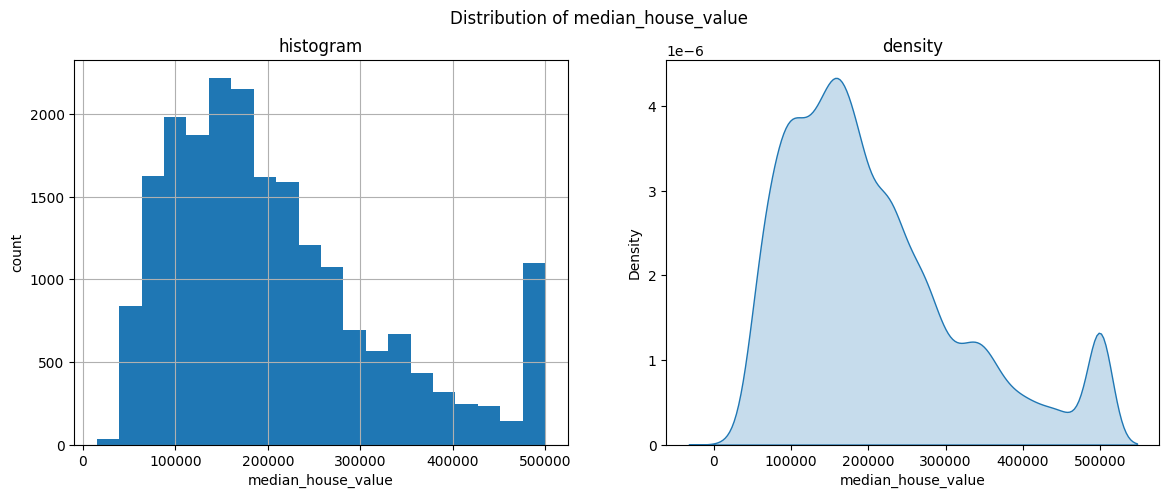

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['median_house_value'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('median_house_value')
plt.title('histogram')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], fill=True, legend=False)
plt.xlabel('median_house_value')
plt.title('density')

plt.suptitle('Distribution of median_house_value')
plt.show()

Различие среднего арифметическое, медианы, моды
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

In [ ]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

In [ ]:
target_mean

206855.82

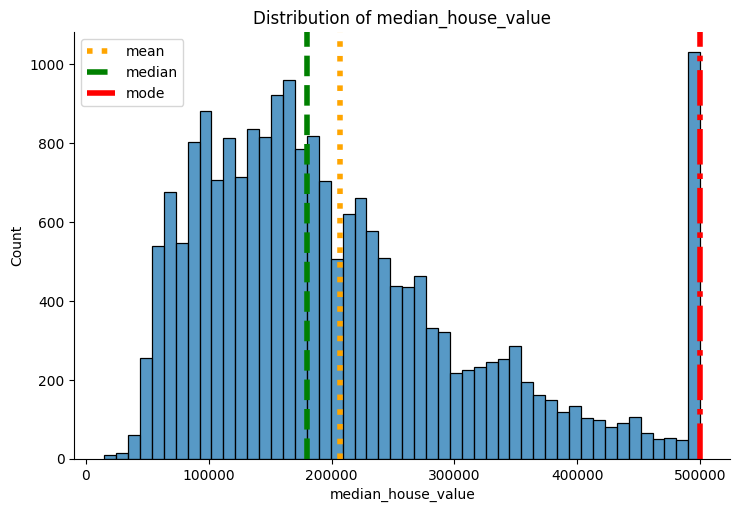

In [ ]:
graph = sns.displot(df['median_house_value'], bins=50, height=5, aspect=1.5)

plt.axvline(target_mean, label='mean', linestyle=':', linewidth=4, color='orange')
plt.axvline(target_median, label='median', linestyle='--', linewidth=4, color='g')
plt.axvline(target_mode, label='mode', linestyle='-.', linewidth=4, color='r')

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

Попробуем не учитывать максимальные значения

In [ ]:
target_mean_adjusted = df[df['median_house_value'] < 500_000]['median_house_value'].mean()
target_median_adjusted = df[df['median_house_value'] < 500_000]['median_house_value'].median()
target_mode_adjusted = df[df['median_house_value'] < 500_000]['median_house_value'].mode()[0]

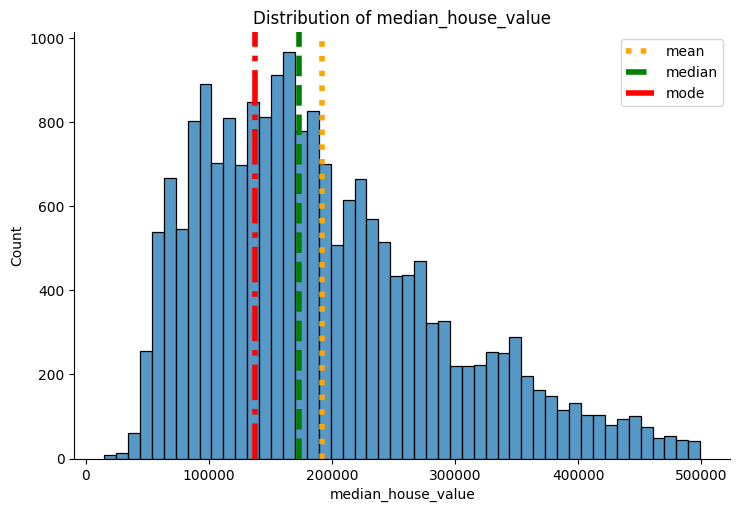

In [ ]:
graph = sns.displot(df[df['median_house_value'] < 500_000]['median_house_value'], bins=50, height=5, aspect=1.5)

plt.axvline(target_mean_adjusted, label='mean', linestyle=':', linewidth=4, color='orange')
plt.axvline(target_median_adjusted, label='median', linestyle='--', linewidth=4, color='g')
plt.axvline(target_mode_adjusted, label='mode', linestyle='-.', linewidth=4, color='r')

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

Можем также проверить распределение таргета на нормальность, что может быть полезно для линейных моделей

In [ ]:
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

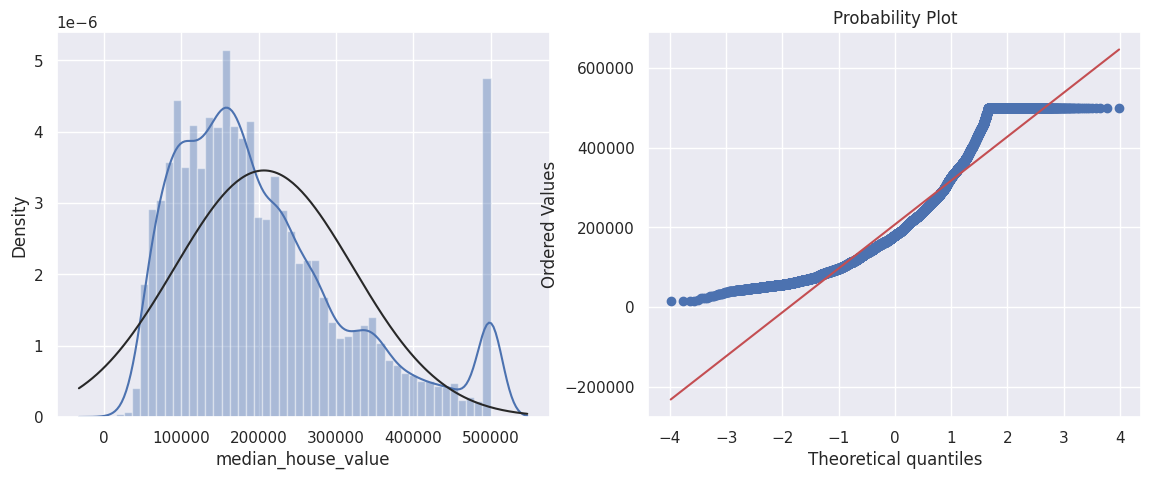

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.distplot(df['median_house_value'], fit=norm);
plt.subplot(122)
stats.probplot(df['median_house_value'], plot=plt)
plt.show()

Можно попробовать применить нелинейное преобразование:
например логарифмирование, корень, обратную величину и т д

In [ ]:
df['median_house_value_log'] = np.log(df['median_house_value'])

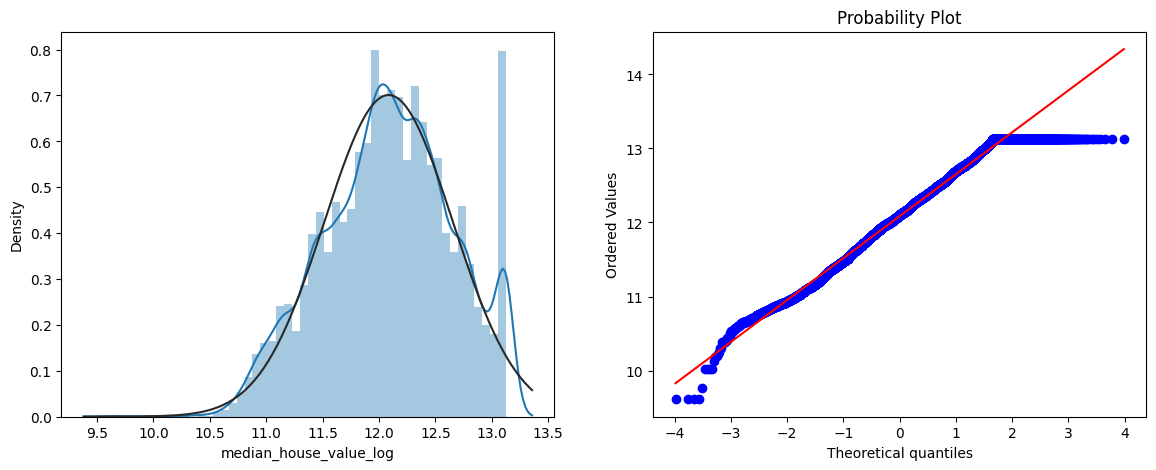

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.distplot(df['median_house_value_log'], fit=norm);
plt.subplot(122)
stats.probplot(df['median_house_value_log'], plot=plt)
plt.show()

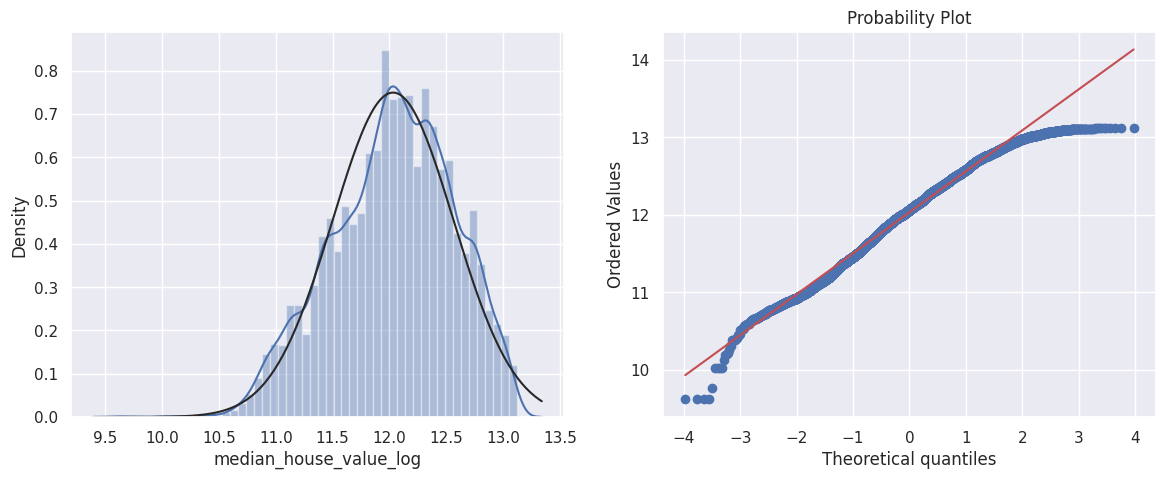

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.distplot(df[df['median_house_value'] < 500_000]['median_house_value_log'], fit=norm);
plt.subplot(122)
stats.probplot(df[df['median_house_value'] < 500_000]['median_house_value_log'], plot=plt)
plt.show()

### Анализ признаков

#### Количественные признаки

In [ ]:
targets = ['median_house_value', 'median_house_value_log']
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop(targets, axis=1, inplace=True)

In [ ]:
df_num_features

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  bedroom_share  \
0           322.0       126.0         8.3252      14.659091   
1          2401.0      1138.0         8.3014      15.579659   
2           496.0       177.0         7.2574      12.951602   
3           558.0       219.0         5.6431      18.445840   
4           565.0       259.0         3.8462      17.209588   
...           ...         ...            ...            ...   
20635       845.0       330.0         1.5603      22.462462   
20636       356.0       114.0         2.5568      21.520803   
20637      1007.0       433.0         1.7000      21.517303   
20638       741.0       349.0         1.8672      21.989247   
20639      1387.0       530.0         2.3886      22.118492   

       population_per_room  mean_income_on_households  \
0                 0.365909                   4.617270   
1                 0.338217                   5.874740   
2                 0.338105                   3.861214   
3                 0.437991                   4.270015   
4                 0.347265                   3.951447   
...                    ...                        ...   
20635             0.507508                   3.702522   
20636             0.510760                   3.582955   
20637             0.446761                   4.259670   
20638             0.398387                   3.590750   
20639             0.498025                   3.686271   

       mean_median_house_value_on_ocean_proximity  
0                                   259212.311790  
1                                   259212.311790  
2                                   259212.311790  
3                                   259212.311790  
4                                   259212.311790  
...                                           ...  
20635                               125000.354332  
20636                               125000.354332  
20637                               125000.354332  
20638                               125000.354332  
20639                               125000.354332  

[20640 rows x 12 columns]

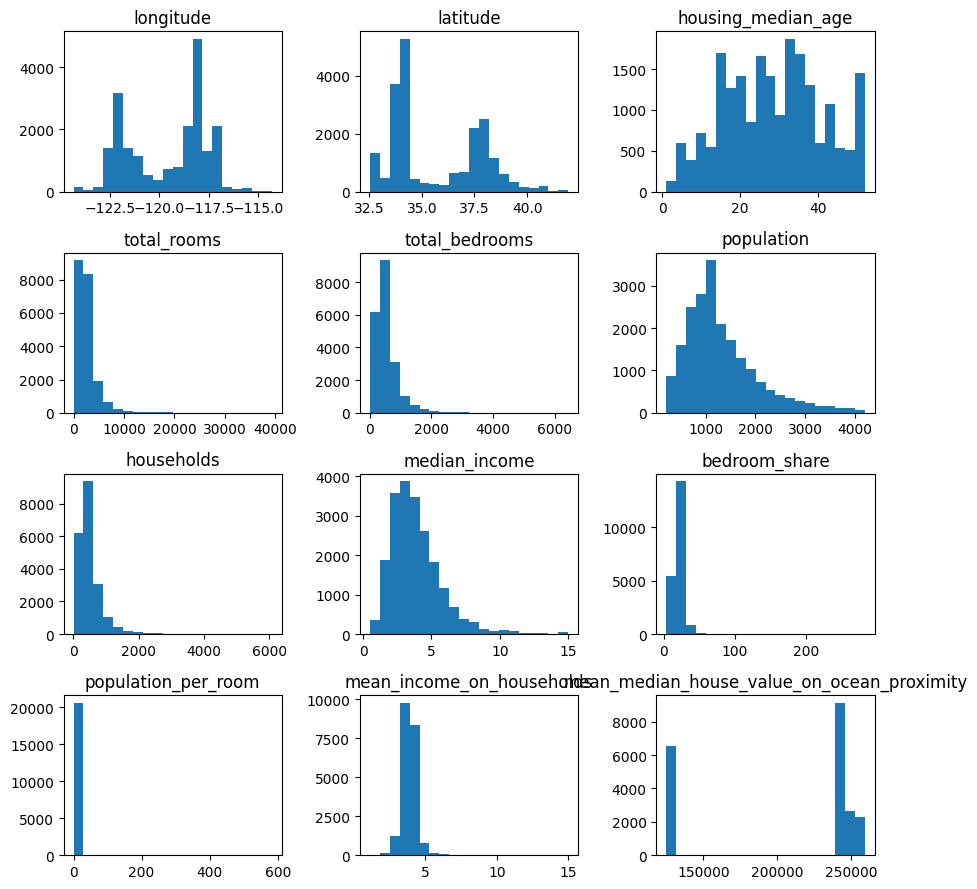

In [ ]:
df_num_features.hist(figsize=(9,9), bins=20, grid=False)
plt.tight_layout()

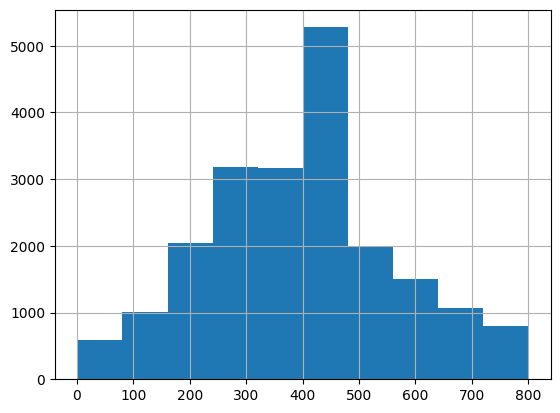

In [ ]:
df.loc[df['households'] > 800, 'households'] = df['households'].median()
df['households'].hist();

**Зависимость цены от возраста**

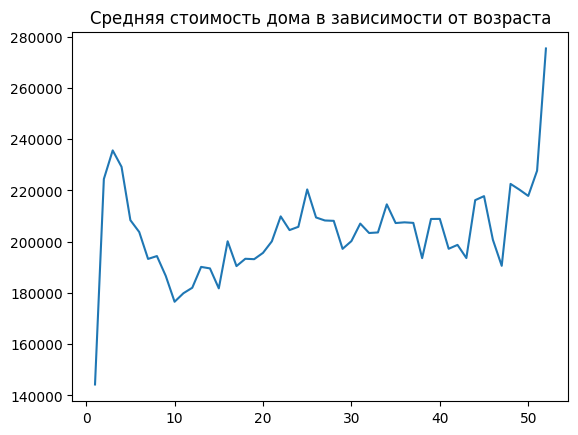

In [ ]:
plt.plot(df.groupby('housing_median_age')['median_house_value'].mean())
plt.title('Средняя стоимость дома в зависимости от возраста')
plt.show()

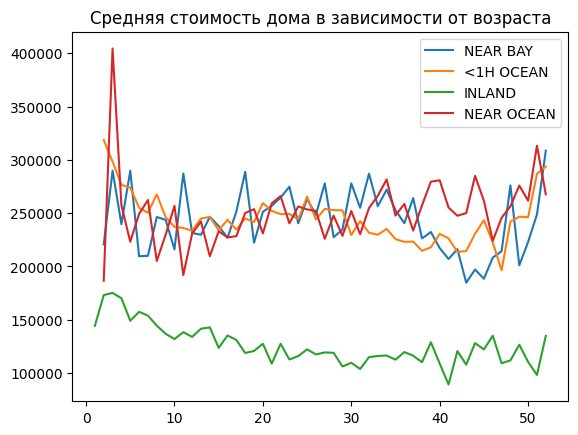

In [ ]:
for ocean_proximity in df['ocean_proximity'].unique():
    plt.plot(
        df[
            df['ocean_proximity'] == ocean_proximity
        ].groupby('housing_median_age')['median_house_value'].mean(),
        label=ocean_proximity,
    )
plt.title('Средняя стоимость дома в зависимости от возраста')
plt.legend()
plt.show()

**Связанные (скоррелированные) признаки**

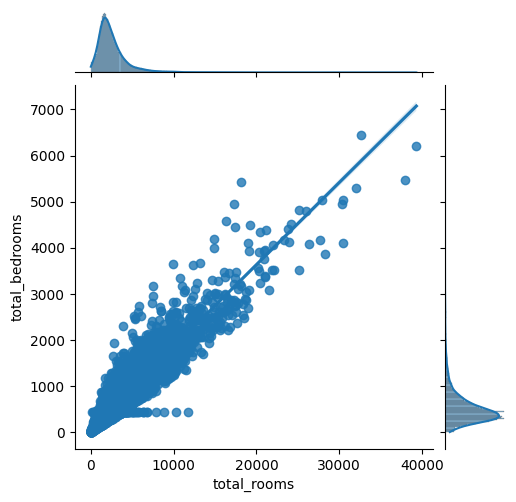

In [ ]:
grid = sns.jointplot(data=df, x='total_rooms', y='total_bedrooms', kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

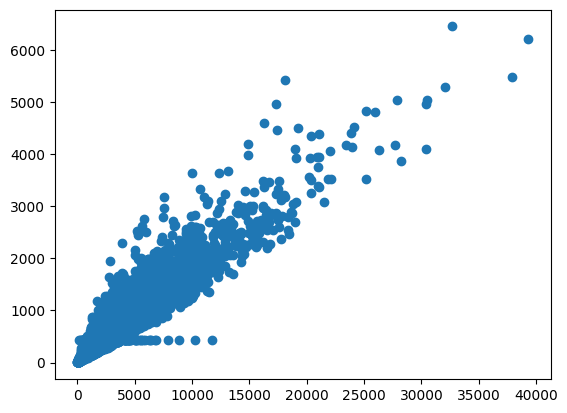

In [ ]:
# похожий график через matplotlib
plt.scatter(df['total_rooms'], df['total_bedrooms'])

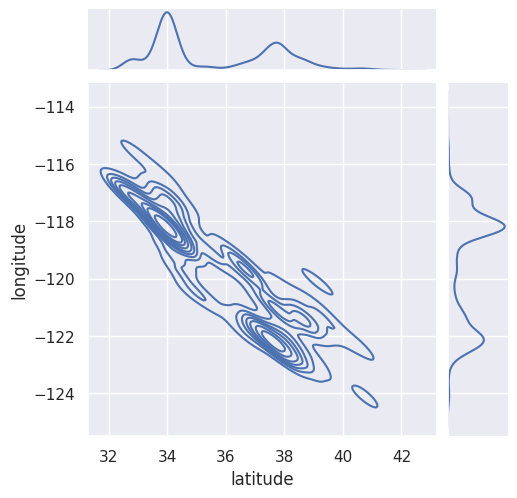

In [ ]:
grid = sns.jointplot(data=df, x='latitude', y='longitude', kind='kde')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

plt.show()

#### Категориальные признаки

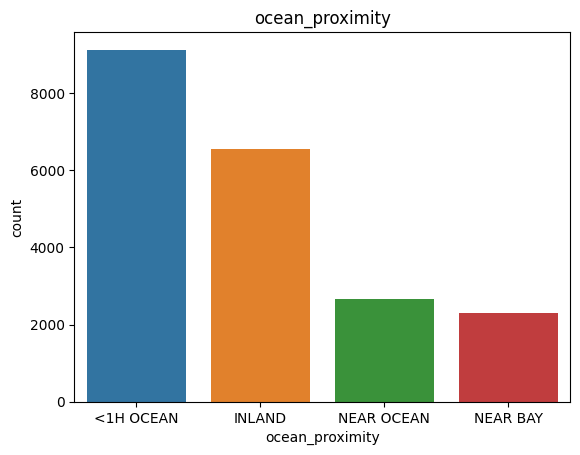

In [ ]:
sns.barplot(df['ocean_proximity'].value_counts(), palette=sns.color_palette())
plt.title('ocean_proximity')
plt.show()

**Как строится box plot**  

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25),
- ...

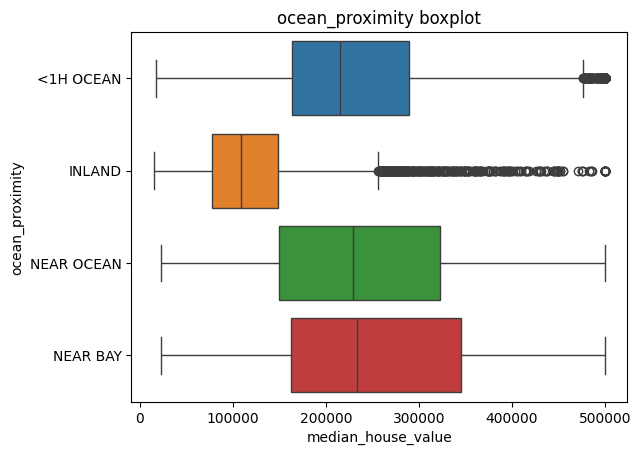

In [ ]:
sns.boxplot(
    data=df,
    x='median_house_value',
    y="ocean_proximity",
    palette=sns.color_palette(),
    order=df['ocean_proximity'].value_counts().index,
)
plt.title('ocean_proximity boxplot')
plt.show()

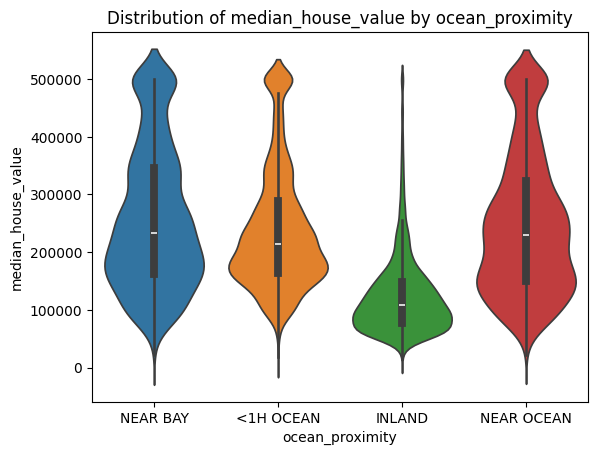

In [ ]:
sns.violinplot(data=df, x="ocean_proximity", y='median_house_value', palette=sns.color_palette())
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### Матрица корреляций

- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только __линейной__ связи

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16', 'int'])
df_num_features.drop('median_house_value_log', axis=1, inplace=True)

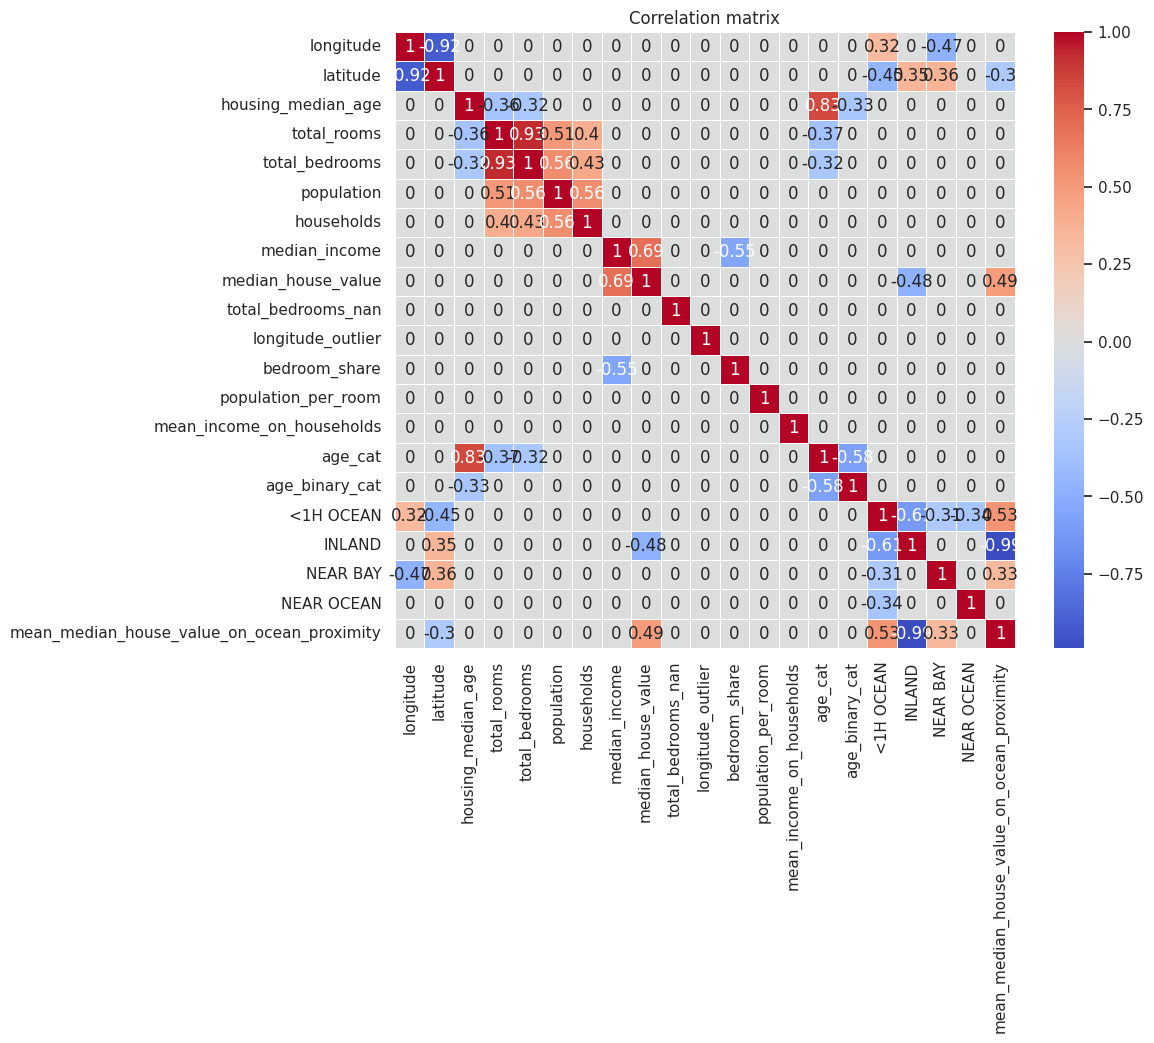

In [ ]:
plt.figure(figsize = (10,8))

sns.set(font_scale=1)

corr_matrix = df_num_features.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

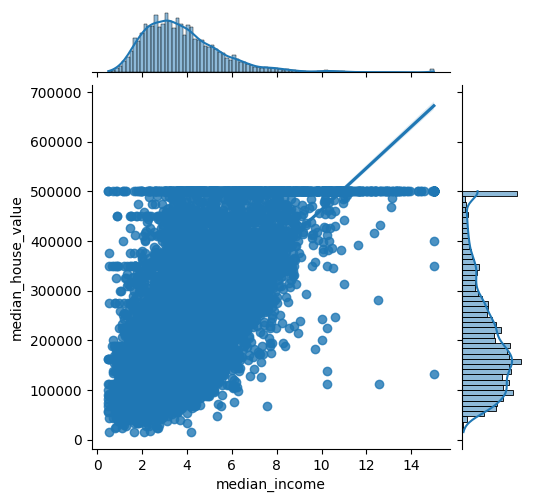

In [ ]:
grid = sns.jointplot(data=df, x='median_income', y='median_house_value', kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

In [ ]:
df['median_income_cbrt'] = np.cbrt(df['median_income'])

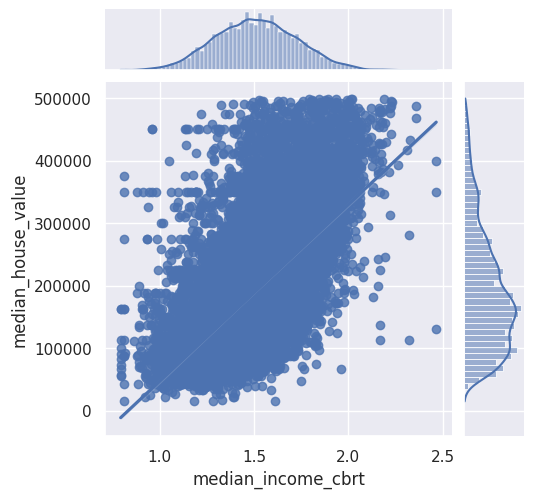

In [ ]:
grid = sns.jointplot(data=df[df['median_house_value'] < 500_000], x='median_income_cbrt', y='median_house_value', kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

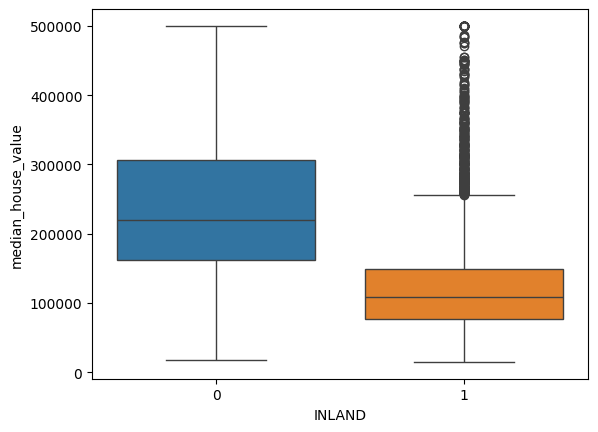

In [ ]:
sns.boxplot(data=df, x="INLAND", y='median_house_value', palette=sns.color_palette())
plt.show()

## *Геоданные

In [ ]:
import matplotlib.image as img

In [ ]:
california_map = img.imread('/content/drive/MyDrive/Colab Notebooks/shift_2024/california_housing/California_Map.png')

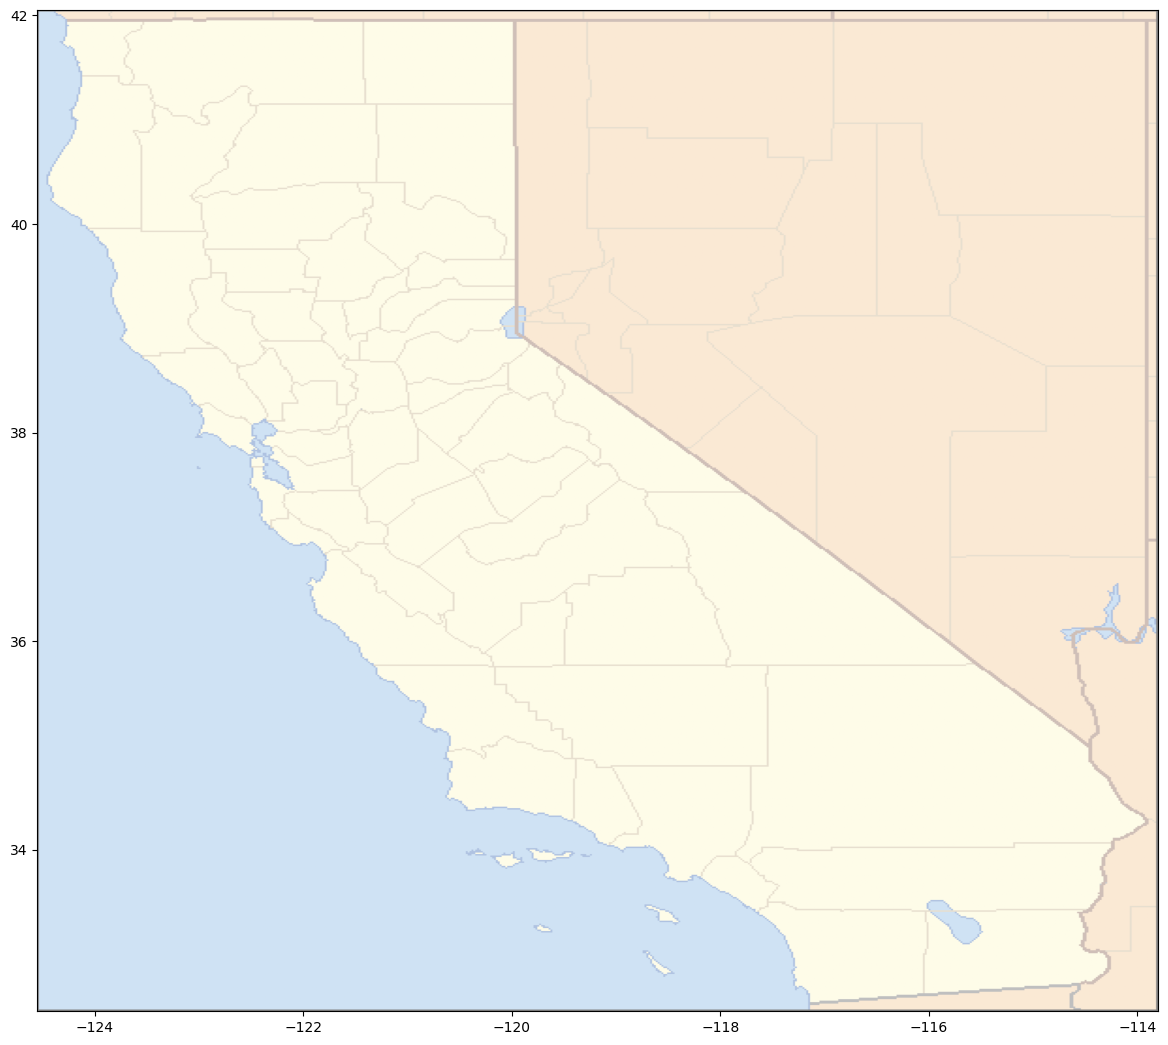

In [ ]:
plt.figure(figsize=(20,13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

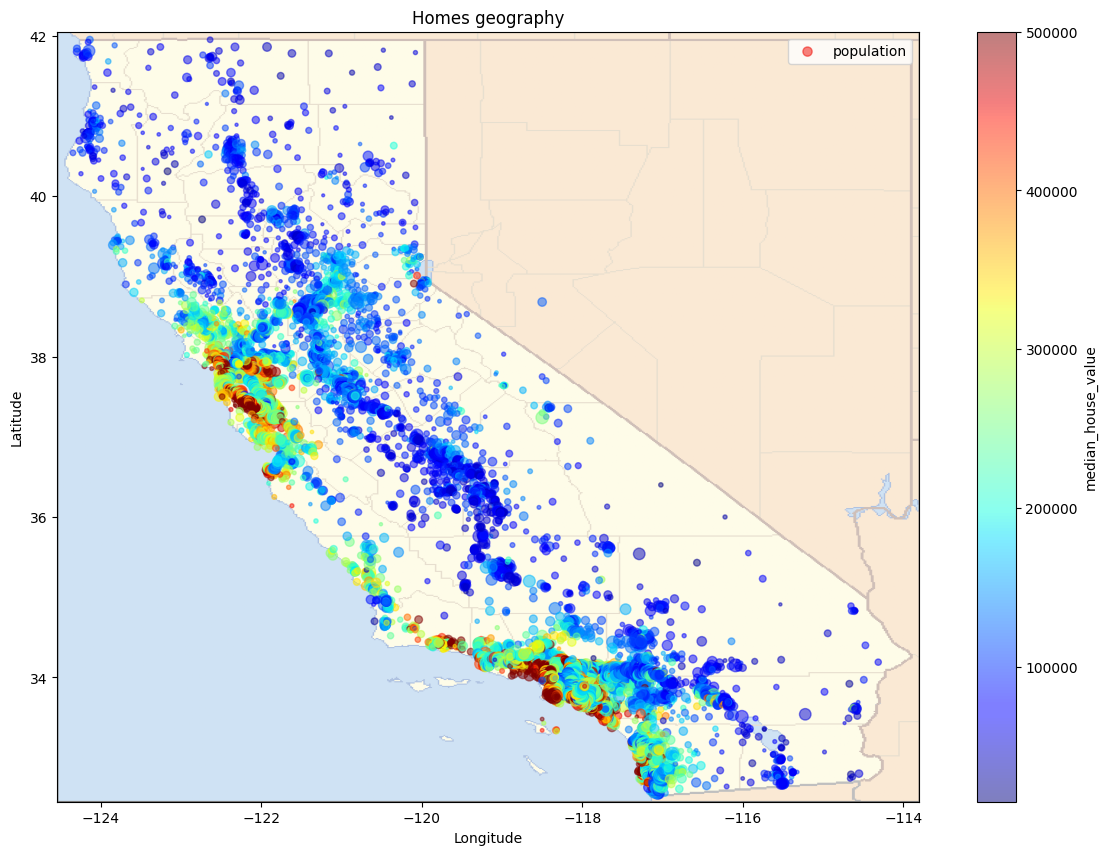

In [ ]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
        s=df['population'] / 50, label='population', c='median_house_value',
        cmap=plt.get_cmap('jet'), figsize=(15,10))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend()
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
folium_map = folium.Map(location=[37, -120])
MarkerCluster(list(zip(df.latitude, df.longitude))).add_to(folium_map)
folium_map

In [ ]:
!pip install reverse_geocoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268063 sha256=74aac18ae7e5ea95eb62b73616dc02c64bc9ff95fa434a1478fbbbc3493d6b26
  Stored in directory: /root/.cache/pip/wheels/bd/e5/88/eb139b6d6a26b8022d370ab991f7a836802fed9871975ec6d9
Successfully built reverse_geocoder


In [ ]:
import reverse_geocoder as revgc
from tqdm import tqdm
import json
tqdm.pandas()

revgc.search((df.iloc[10].latitude, df.iloc[10].longitude))

Loading formatted geocoded file...


[{'lat': '37.87159',
  'lon': '-122.27275',
  'name': 'Berkeley',
  'admin1': 'California',
  'admin2': 'Alameda County',
  'cc': 'US'}]

In [ ]:
# df['geocoding_result'] = df.progress_apply(lambda x: revgc.search((x.latitude, x.longitude)), axis=1)
# df[['longitude', 'latitude', 'geocoding_result']].to_pickle('/content/drive/MyDrive/Colab Notebooks/shift_2024/california_housing/geocoding_result.pickle')
df['geocoding_result'] = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/shift_2024/california_housing/geocoding_result.pickle')['geocoding_result']

In [ ]:
df['geocoding_result'] = df['geocoding_result'].str[0]

In [ ]:
pd.json_normalize(df['geocoding_result'])

lat         lon                   name      admin1  \
0      37.87159  -122.27275               Berkeley  California   
1      37.82437  -122.23163               Piedmont  California   
2      37.82437  -122.23163               Piedmont  California   
3      37.87159  -122.27275               Berkeley  California   
4      37.87159  -122.27275               Berkeley  California   
...         ...         ...                    ...         ...   
20635  39.46447  -121.26338  Challenge-Brownsville  California   
20636  39.46447  -121.26338  Challenge-Brownsville  California   
20637  39.46447  -121.26338  Challenge-Brownsville  California   
20638  39.46447  -121.26338  Challenge-Brownsville  California   
20639  39.46447  -121.26338  Challenge-Brownsville  California   

               admin2  cc  
0      Alameda County  US  
1      Alameda County  US  
2      Alameda County  US  
3      Alameda County  US  
4      Alameda County  US  
...               ...  ..  
20635     Yuba County  US  
20636     Yuba County  US  
20637     Yuba County  US  
20638     Yuba County  US  
20639     Yuba County  US  

[20640 rows x 6 columns]

In [ ]:
df = pd.concat([df, pd.json_normalize(df['geocoding_result'])], axis=1)
df = df.drop(columns='geocoding_result')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0       409.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ...  NEAR OCEAN  mean_median_house_value_on_ocean_proximity  \
0  ...           0                                259212.31179   
1  ...           0                                259212.31179   
2  ...           0                                259212.31179   
3  ...           0                                259212.31179   
4  ...           0                                259212.31179   

   median_house_value_log  median_income_cbrt       lat         lon      name  \
0               13.022764            2.026741  37.87159  -122.27275  Berkeley   
1               12.789684            2.024808  37.82437  -122.23163  Piedmont   
2               12.771671            1.936097  37.82437  -122.23163  Piedmont   
3               12.740517            1.780352  37.87159  -122.27275  Berkeley   
4               12.743151            1.566789  37.87159  -122.27275  Berkeley   

       admin1          admin2  cc  
0  California  Alameda County  US  
1  California  Alameda County  US  
2  California  Alameda County  US  
3  California  Alameda County  US  
4  California  Alameda County  US  

[5 rows x 30 columns]